# Хоёр дараалал зэрэгцүүлэл(Pairwise Sequence Alignment)

## Дарааллууд харьцуулах

**Биоформатикийн биологийн судалгаанд авчирсан гол давуу талуудын нэг нь ген болон уурагт кодллогдсон функцийг тайлбарлахад чиглэдэг.**

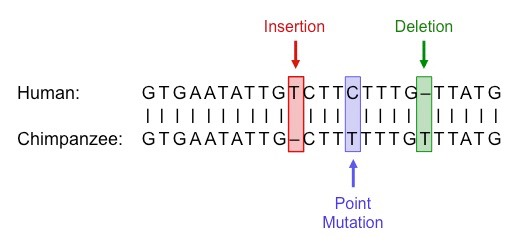

## Дараалал зэрэгцүүлэлт (Sequence Alignment)

**Дарааллын зэрэгцүүлэлт**:Тооцоолох процедур нь дарааллууд дээрх ижил дэсээр давхцаж буй тэмдэгтүүдийг хайдаг.

**Тусгаарлагч (Gaps)** : тэмдэгт хэрэглэн давхцлын тэмдэгтүүдийг улам олшруулдаг.

**Зорилгын функц:**
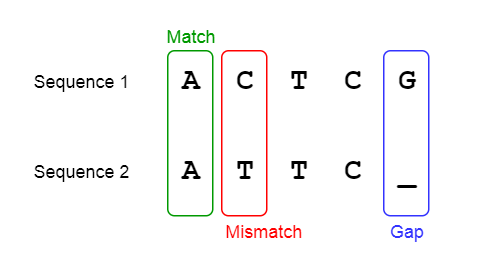

* **Глобал**: дарааллыг бүхэлд нь зэрэгцүүлэх
* **Локал**: хоёр дарааллын хамгийн сайн зэрэгцсэн хэсгийг олох зорилготой.

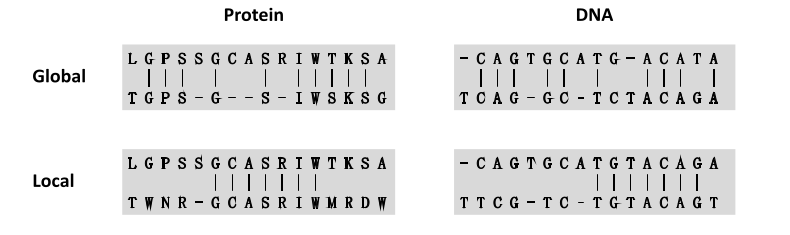

## Visual зэрэгцүүлэлт  
**Dot plots:** Хоёр дарааллын төстэй хэсгүүдийг визуалаар харах боломжтой

In [1]:
# тэгээр дүүргэсэн матриц үүсгэх
def create_mat(nrows, ncols):
    mat = []
    for i in range(nrows):
        mat.append([])
        for j in range(ncols):
            mat[i].append(0)
    return mat

# Давхцсан тэмдэгт байвал 1 болгоно
# Ихэнх тохиолдолд шуугиан(noise) ихтэй тул үр дүнд нөлөөлөх нь түгээмэл
def dotplot(seq1, seq2):
    mat = create_mat(len(seq1), len(seq2))
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if seq1[i] == seq2[j]:
                mat[i][j] = 1
    return mat

# dotplot хэвлэх
def print_dotplot(mat, s1, s2):
    import sys
    sys.stdout.write(" " + s2+"\n")
    for i in range(len(mat)):
        sys.stdout.write(s1[i])
        for j in range(len(mat[i])):
            if mat[i][j] >= 1:
                sys.stdout.write("*")
            else:
                sys.stdout.write(" ")
        sys.stdout.write("\n")

# Өрөгтөгсөн Dot Plots
# Матрицыг үүсгэхдээ дарааллын байрлал бүрийг агуулсан цонхны хувьд авч үзнэ
# Дарааллуудын харгалзах цонхнуудын ижил тэмдэгтийг тоолно.
# Хэрэв өгөгдсөн параметр болох stringency-ээс их бол л харгалзах нүдэнд тэмдэглэнэ, үгүй бол орхино.
def extended_dotplot (seq1, seq2, window, stringency):
    mat = create_mat(len(seq1), len(seq2))
    start = int(window/2)
    for i in range(start,len(seq1)-start):
        for j in range(start, len(seq2)-start):
            matches = 0
            l = j - start
            for k in range(i-start, i+start+1):
                if seq1[k] == seq2[l]: matches += 1
                l += 1
                if matches >= stringency: mat[i][j] = 1
    return mat

def test():
    s1 = "CGATATAGATT"
    s2 = "TATATAGTAT"
    
    mat1 = dotplot(s1, s2)
    # DotPlot
    print_dotplot(mat1, s1, s2)
    
    print("")    
    mat2 = extended_dotplot(s1, s2, 5, 4)
    # Extended DotPlot
    print_dotplot(mat2, s1, s2)
    
if __name__ == "__main__": 
    test()


 TATATAGTAT
C          
G      *   
A * * *  * 
T* * *  * *
A * * *  * 
T* * *  * *
A * * *  * 
G      *   
A * * *  * 
T* * *  * *
T* * *  * *

 TATATAGTAT
C          
G          
A          
T  *       
A   *      
T  * *     
A   * *    
G  *       
A          
T          
T          


## Дараалал зэрэгцүүлэлт ба Оновчлолын асуудал(Sequence Alignment as an Optimization Problem)

Дараалал зэрэгцүүлэлтийн процесс нь оновчлолын асуудал гэдгийг ойлгох хэрэгтэй. Ө/х хэд хэдэн боломжит шийдүүдээс хамгийн сайныг нь сонгодог.

* Дараалал зэрэгцүүлэлтийн хувьд боломжит шийдүүд нь дараалалд зай (gaps) оруулах байрлалуудын комбинац бна.
    * Оролт: Нэгдсэн цагаан толгой дээх хоёр дараалал; зэрэгцүүлэлтийн шийд бүрийг үнэлэх зорилтын функц;
    * Гаралт: Дараалалууд дээрх тэмдэгтүүд хоорондын оновчтой харгалзуулзалт (зайг тохиромжтой байрлалд оруулах)



### Зорилгын функц

* Ижил тэмдэгтэй (matches)** Баганад 1, **ялгаатай тэмдэгтэй (mismatches)** болон **зай(gaps)** баганад 0утга

* Био дарааалал зэрэгцүүлэллтийн зорилгын функц нь ихэвчлэн илүү ерөнхий уян хатан байх үүднээс хоёр төрөлтэй.
    > **Орлуулгын матриц (substitution matrix):** Баганад нь зай ороогүй байх бүх тохиолдлын онооны утгыг агуулдаг
    > **Зайн торгуулийн*(gap penalty) функц: Цоорхой (эсвэл загвараас хамаарсан зайн дараалал) - г хэрхэн торгохыг тодорхойлдог.

**Implementing the Calculation of the Objective Function**

In [2]:
def create_submat (match, mismatch, alphabet):
    sm = {}
    for c1 in alphabet:
        for c2 in alphabet:
            if (c1 == c2):
                sm[c1+c2] = match
            else:
                sm[c1+c2] = mismatch
    return sm

def test_DNA():
    sm = create_submat(1,0,"ACGT")
    print(sm)

test_DNA()

{'AA': 1, 'AC': 0, 'AG': 0, 'AT': 0, 'CA': 0, 'CC': 1, 'CG': 0, 'CT': 0, 'GA': 0, 'GC': 0, 'GG': 1, 'GT': 0, 'TA': 0, 'TC': 0, 'TG': 0, 'TT': 1}


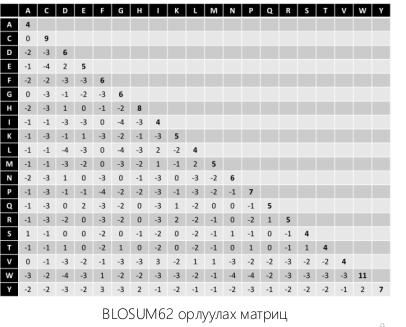

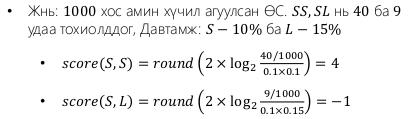

In [3]:
# read substitution matrix from file
# Орлуулгын матриц 
# Цагаан толгойн тэмдэгтүүдийн боломжит хос бүрт утга онооно.
def read_submat_file(filename):
    sm = {}
    f = open(filename, "r")
    line = f.readline()
    tokens = line.split("\t")
    ns = len(tokens)
    alphabet = []
    for i in range(0, ns): 
        alphabet.append(tokens[i][0])
    for i in range(0,ns):
        line = f.readline();
        tokens = line.split("\t");
        for j in range(0, len(tokens)):
            k = alphabet[i]+alphabet[j]
            sm[k] = int(tokens[j])
    return sm

# BLOSUM (Blocks of Amino Acid Substitution Matrix) family
# Blocks ӨС-ийн локал зэрэгцүүлэлт дээр суурилдаг.
# Суурилсан локал зэрэгцүүлэлтийн ижил төстэйн түвшингээс хамаарсан хэд хэдэн матрицтай.
# Жнь, BLOSUM62 матрицад ижил төсөө нь 62%-иас дээш байх зэрэгцүүлэлт ашигласан.
def test_DNA():
    sm = read_submat_file("files/blosum62.mat")
    print(sm)
    
test_DNA()

{'AA': 4, 'AR': -1, 'AN': -2, 'AD': -2, 'AC': 0, 'AQ': -1, 'AE': -1, 'AG': 0, 'AH': -2, 'AI': -1, 'AL': -1, 'AK': -1, 'AM': -1, 'AF': -2, 'AP': -1, 'AS': 1, 'AT': 0, 'AW': -3, 'AY': -2, 'AV': 0, 'RA': -1, 'RR': 5, 'RN': 0, 'RD': -2, 'RC': -3, 'RQ': 1, 'RE': 0, 'RG': -2, 'RH': 0, 'RI': -3, 'RL': -2, 'RK': 2, 'RM': -1, 'RF': -3, 'RP': -2, 'RS': -1, 'RT': -1, 'RW': -3, 'RY': -2, 'RV': -3, 'NA': -2, 'NR': 0, 'NN': 6, 'ND': 1, 'NC': -3, 'NQ': 0, 'NE': 0, 'NG': 0, 'NH': 1, 'NI': -3, 'NL': -3, 'NK': 0, 'NM': -2, 'NF': -3, 'NP': -2, 'NS': 1, 'NT': 0, 'NW': -4, 'NY': -2, 'NV': -3, 'DA': -2, 'DR': -2, 'DN': 1, 'DD': 6, 'DC': -3, 'DQ': 0, 'DE': 2, 'DG': -1, 'DH': -1, 'DI': -3, 'DL': -4, 'DK': -1, 'DM': -3, 'DF': -3, 'DP': -1, 'DS': 0, 'DT': -1, 'DW': -4, 'DY': -3, 'DV': -3, 'CA': 0, 'CR': -3, 'CN': -3, 'CD': -3, 'CC': 9, 'CQ': -3, 'CE': -4, 'CG': -3, 'CH': -3, 'CI': -1, 'CL': -1, 'CK': -3, 'CM': -1, 'CF': -2, 'CP': -3, 'CS': -1, 'CT': -1, 'CW': -2, 'CY': -2, 'CV': -1, 'QA': -1, 'QR': 1, 'QN': 0, 

**Зай торгуулийн (gap penalty) функц**

* Зай гарсан багана бүрийн тогтмол торгуулийг тодорхойлсон g параметрийг ашиглана.
* Уургийн дараалал зэрэгцүүлэлтийн g-ийн ердийн (matched байх) утгууд нь DNA дараалал зэрэгцүүлэлт дээрх −7 -оос −12, эсвэл −2 -оос −3 хооронд хэлбэлзэж болно

In [4]:
# score of a position (column)
def score_pos (c1, c2, sm, g):
    if c1 == "-" or c2=="-":
        return g
    else:
        return sm[c1+c2]

# score of the whole alignment
def score_align (seq1, seq2, sm, g):
    res = 0;
    for i in range(len(seq1)):
        res += score_pos (seq1[i], seq2[i], sm, g)
    return res

def test_DNA():
    sm = create_submat(2, -2, 'ACGT')
    seq1 = "-CAGTGCATG-ACATA"
    seq2 = "TCAG-GC-TCTACAGA"
    g = -3
    print(score_align(seq1, seq2, sm, g))
    
def test_prot():
    sm = read_submat_file("files/blosum62.mat")
    seq1 = "LGPSSGCASRIWTKSA"
    seq2 = "TGPS-G--S-IWSKSG"
    g = -8
    print(score_align(seq1, seq2, sm, g))
    
test_DNA()
test_prot()

4
19


**Affine gap penalty** загвар

    * Практикт өргөн хэрэглэгдэж байгаа илүү боловсронгуй хувилбар
    * Зай эхлэхэд маш их торгууль ногдуулдаг (зай эхллүүлэх торгууль g)
    * Зайг сунган нэмэх торгууль бага. (торгууль нь ихэвчлэн r = -1 эсвэл -2 байж болно)

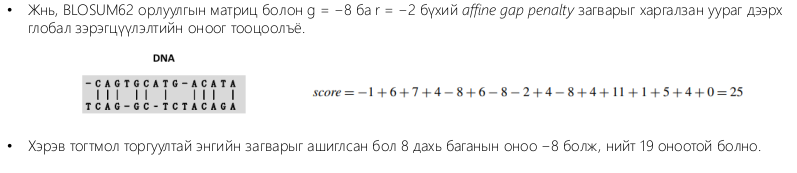

In [5]:
def score_affinegap (seq1, seq2, sm, g, r):
    res = 0
    ingap1 = False
    ingap2 = False
    for i in range(len(seq1)):
        if seq1[i]=="-":
            if ingap1: res += r
            else:
                ingap1 = True
                res += g
        elif seq2[i]=="-":
            if ingap2: res += r
            else:
                ingap2 = True
                res += g 
        else:
            if ingap1: ingap1 = False
            if ingap2: ingap2 = False
            res += sm[seq1[i]+seq2[i]]
    return res

def test_prot():
    sm = read_submat_file("files/blosum62.mat")
    seq1 = "LGPSSGCASRIWTKSA"
    seq2 = "TGPS-G--S-IWSKSG"
    g = -8
    r = -2
    print(score_affinegap(seq1,seq2, sm,g,r))

test_prot()

25


### Дараалал зэрэгцүүлэлтэд зориулсан динамик программчлал


**Динамик программчлал (DP)** бол **divide-and-conquer** аргад суурилсан
оновчлолын алгоритмуудын **ерөнхий зориулалтын (general-purpose)** анги бөгөөд том
хэмжээний асуудлыг шийдвэрлэхдээ дэд асуудлууд болон тэдгээрийн онооны шийдүүдийг дахин
ашигладаг (дахин тооцоолдоггүй).


Динамик программчлалын алгоритмууд

    • Глобал зэрэгцүүлэлт: The Needleman-Wunsch Algorithm

    • Локал зэрэгцүүлэлт: The Smith-Waterman Algorithm

Смит-Уотерманы алгоритмын анхны онооны матриц нь нэг дарааллын аль ч сегментийг нөгөө дарааллын дурын байрлалд зэрэгцүүлэх боломжийг олгодог. Харин Needleman-Wunsch алгоритм дээр бүх дарааллыг тэгшитгэхийн тулд төгсгөлийн цоорхойг тооцох шаардлагатай.

In [6]:
### Implementing the Needleman-Wunsch Algorithm
## global alignment 
def needleman_Wunsch(seq1, seq2, sm, g):
    S = [[0]]
    T = [[0]]
    for j in range(1, len(seq2)+1):
        S[0].append(g * j)
        T[0].append(3)
    for i in range(1, len(seq1)+1):
        S.append([g * i])
        T.append([2])
    for i in range(0, len(seq1)):
        for j in range(len(seq2)):
            s1 = S[i][j] + score_pos (seq1[i], seq2[j], sm, g); 
            s2 = S[i][j+1] + g
            s3 = S[i+1][j] + g
            S[i+1].append(max(s1, s2, s3))
            T[i+1].append(max3t(s1, s2, s3))
            
    return (S, T)

def max3t (v1, v2, v3):
    if v1 > v2:
        if v1 > v3: return 1
        else: return 3
    else:
        if v2 > v3: return 2
        else: return 3

def recover_align (T, seq1, seq2):
    res = ["", ""]
    i = len(seq1)
    j = len(seq2)
    while i>0 or j>0:
        if T[i][j]==1:
            res[0] = seq1[i-1] + res[0]
            res[1] = seq2[j-1] + res[1]
            i -= 1
            j -= 1
        elif T[i][j] == 3:
            res[0] = "-" + res[0]
            res[1] = seq2[j-1] + res[1]
            j -= 1
        else:
            res[0] = seq1[i-1] + res[0]
            res[1] = "-" + res[1]
            i -= 1
    return res

def print_mat (mat):
    for i in range(0, len(mat)):
        print(mat[i]) 

def test_global_alig():
    sm = read_submat_file("files/blosum62.mat")
    seq1 = "TACT"
    seq2 = "ACTA"
    res = needleman_Wunsch(seq1, seq2, sm, -3)
    S = res[0]
    T = res[1]
    print("Score of optimal alignment:", S[len(seq1)][len(seq2)])
    print_mat(S)
    print_mat(T)
    alig = recover_align(T, seq1, seq2)
    print(alig[0])
    print(alig[1])

test_global_alig()

Score of optimal alignment: 12
[0, -3, -6, -9, -12]
[-3, 0, -3, -1, -4]
[-6, 1, 0, -3, 3]
[-9, -2, 10, 7, 4]
[-12, -5, 7, 15, 12]
[0, 3, 3, 3, 3]
[2, 1, 3, 1, 3]
[2, 1, 1, 3, 1]
[2, 2, 1, 3, 3]
[2, 2, 2, 1, 3]
TACT-
-ACTA


**Смит-Уотерманы алгоритм**

* Өмнөх алгоритмтай харьцуулахад:
     > Оноо тооцоолох аргад ямар ч өөрчлөлт орохгүй
     
     > Сөрөг утга гарч ирэх хэсэг дээр нь зэрэгцүүлэлтийг эхлүүлнэ.
     
     > Ингэхдээ рекуррент харьцаанд 0 утгыг нэмж оруулна.

In [7]:
## local alignment
def smith_Waterman (seq1, seq2, sm, g):
    S = [[0]]
    T = [[0]]
    maxscore = 0
    for j in range(1, len(seq2)+1):
        S[0].append(0)
        T[0].append(0)
    for i in range(1, len(seq1)+1):
        S.append([0])
        T.append([0])
    for i in range(0, len(seq1)):
        for j in range(len(seq2)):
            s1 = S[i][j] + score_pos (seq1[i], seq2[j], sm, g); 
            s2 = S[i][j+1] + g
            s3 = S[i+1][j] + g
            b = max(s1, s2, s3)
            if b <= 0:
                S[i+1].append(0)
                T[i+1].append(0)
            else:
                S[i+1].append(b)
                T[i+1].append(max3t(s1, s2, s3))
                if b > maxscore: 
                    maxscore = b
    return (S, T, maxscore)

def recover_align_local (S, T, seq1, seq2):
    res = ["", ""]
    i, j = max_mat(S)
    while T[i][j]>0:
        if T[i][j]==1:
            res[0] = seq1[i-1] + res[0]
            res[1] = seq2[j-1] + res[1]
            i -= 1
            j -= 1
        elif T[i][j] == 3:
            res[0] = "-" + res[0];
            res[1] = seq2[j-1] + res[1] 
            j -= 1
        elif T[i][j] == 2:
            res[0] = seq1[i-1] + res[0]
            res[1] = "-" + res[1]
            i -= 1
    return res

def max_mat(mat):
    maxval = mat[0][0]
    maxrow = 0
    maxcol = 0
    for i in range(0,len(mat)):
        for j in range(0, len(mat[i])):
            if mat[i][j] > maxval:
                maxval = mat[i][j]
                maxrow = i
                maxcol = j
    return (maxrow,maxcol)

def test_local_alig():
    sm = read_submat_file("files/blosum62.mat")
    seq1 = "PHSWG"
    seq2 = "HGWAG"
    res = smith_Waterman(seq1, seq2, sm, -8)
    S = res[0]
    T = res[1]
    print("Score of optimal alignment:", res[2])
    print_mat(S)
    print_mat(T)
    alinL= recover_align_local(S, T, seq1, seq2)
    print(alinL[0])
    print(alinL[1])
    
test_local_alig()

Score of optimal alignment: 19
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 8, 0, 0, 0, 0]
[0, 0, 8, 0, 1, 0]
[0, 0, 0, 19, 11, 3]
[0, 0, 6, 11, 19, 17]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0]
[0, 0, 0, 1, 3, 3]
[0, 0, 1, 2, 1, 1]
HSW
HGW


**Special Cases of Sequence Alignment**

In [8]:
def identity(seq1, seq2, alphabet = "ACGT"):
    sm = create_submat(1,0,alphabet) 
    S,_ = needleman_Wunsch(seq1, seq2, sm, 0)
    equal = S[len(seq1)][len(seq2)]
    return equal / max(len(seq1), len(seq2))  

def edit_distance(seq1, seq2, alphabet = "ACTG"):
    sm = create_submat(0, -1, alphabet) 
    S = needleman_Wunsch(seq1, seq2,sm,-1)[0]
    res = -1*S[len(seq1)][len(seq2)]
    return res

def longest_common_subseq (seq1, seq2, alphabet = "ACGT"):
    sm = create_submat(1, 0, alphabet) 
    _,T = needleman_Wunsch(seq1, seq2, sm, 0)
    alin = recover_align(T, seq1, seq2)
    
    sizeal = len(alin[0])
    lcs = ""
    for i in range(sizeal):
        if alin[0][i] == alin[1][i]:
            lcs += alin[0][i]
    return lcs

def longest_common_string (seq1, seq2, alphabet = "ACGT"):
    m = max(len(seq1), len(seq2))
    pen = -1 * (m+1)
    sm = create_submat(1, pen, alphabet)
    S,T,_ = smith_Waterman(seq1, seq2, sm, pen)
    alinL= recover_align_local(S, T, seq1, seq2)
    return alinL[0]

print(identity("ATAGAT","TTAGT"))

0.6666666666666666


**Pairwise Sequence Alignment in BioPython**

http://biopython.org/DIST/docs/api/Bio.pairwise2-module.html

In [9]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.SubsMat import MatrixInfo 

alignments = pairwise2.align.globalxx("ATAGAGAATAG", "ATGGCAGATAGA")

print(len(alignments))

for a in alignments: 
    print(format_alignment(*a))

matrix = MatrixInfo.blosum62
for a in pairwise2.align.globalds("KEVLA", "EVSAW", matrix,-4,-1):
    print(format_alignment(*a))
    

local_dna = pairwise2.align.localms("ATAGAGAATAG", "GGGAGAATC", 3,-2,-3,-3)
for a in local_dna: print(format_alignment(*a))

local_prot = pairwise2.align.localds("KEVLA", "EVSAW", matrix,-4,-1)
for a in local_prot: print(format_alignment(*a))


7
ATAGAG-A-ATAG-
|| | | | |||| 
AT-G-GCAGATAGA
  Score=9

ATAG--AGAATAG-
|| |  || |||| 
AT-GGCAG-ATAGA
  Score=9

ATA-G-AGAATAG-
||  | || |||| 
AT-GGCAG-ATAGA
  Score=9

ATAG-AGAATAG-
||.| || |||| 
ATGGCAG-ATAGA
  Score=9

ATAG--AGAATAG-
|| |  ||| ||| 
AT-GGCAGA-TAGA
  Score=9

ATA-G-AGAATAG-
||  | ||| ||| 
AT-GGCAGA-TAGA
  Score=9

ATAG-AGAATAG-
||.| ||| ||| 
ATGGCAGA-TAGA
  Score=9

KEVLA-
 ||.| 
-EVSAW
  Score=3

4 GAGAAT
  ||||||
3 GAGAAT
  Score=18

2 EVLA
  ||.|
1 EVSA
  Score=11



/home/jakitcs/anaconda3/lib/python3.9/site-packages/Bio/SubsMat/__init__.py:126: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  warnings.warn(


## Exercises

### 1 a. Consider the application of the Smith-Waterman algorithm to the sequences: S1: ANDDR; S2: AARRD. The alignment parameters should be the BLOSUM62 sub-stitution matrix and the value of g = −8. Calculate (by hand); (i) the S matrix with the best scores; (ii) the trace-back matrix; (iii) the optimal alignment and its score. Check if there are any alternative optimal alignments.

In [10]:
def smith_Waterman (seq1, seq2, sm, g):
    S = [[0]]
    T = [[0]]
    maxscore = 0
    for j in range(1, len(seq2)+1):
        S[0].append(0)
        T[0].append(0)
    for i in range(1, len(seq1)+1):
        S.append([0])
        T.append([0])
    for i in range(0, len(seq1)):
        for j in range(len(seq2)):
            s1 = S[i][j] + score_pos (seq1[i], seq2[j], sm, g); 
            s2 = S[i][j+1] + g
            s3 = S[i+1][j] + g
            b = max(s1, s2, s3)
            if b <= 0:
                S[i+1].append(0)
                T[i+1].append(0)
            else:
                S[i+1].append(b)
                T[i+1].append(max3t(s1, s2, s3))
                if b > maxscore: 
                    maxscore = b
    return (S, T, maxscore)

def recover_align_local (S, T, seq1, seq2):
    res = ["", ""]
    i, j = max_mat(S)
    while T[i][j]>0:
        if T[i][j]==1:
            res[0] = seq1[i-1] + res[0]
            res[1] = seq2[j-1] + res[1]
            i -= 1
            j -= 1
        elif T[i][j] == 3:
            res[0] = "-" + res[0];
            res[1] = seq2[j-1] + res[1] 
            j -= 1
        elif T[i][j] == 2:
            res[0] = seq1[i-1] + res[0]
            res[1] = "-" + res[1]
            i -= 1
    return res

def max_mat(mat):
    maxval = mat[0][0]
    maxrow = 0
    maxcol = 0
    for i in range(0,len(mat)):
        for j in range(0, len(mat[i])):
            if mat[i][j] > maxval:
                maxval = mat[i][j]
                maxrow = i
                maxcol = j
    return (maxrow,maxcol)

def test_local_alig():
    sm = read_submat_file("files/blosum62.mat")
    seq1 = "ANDDR"
    seq2 = "AARRD"
    res = smith_Waterman(seq1, seq2, sm, -8)
    S = res[0]
    T = res[1]
    print("Score of optimal alignment:", res[2])
    print_mat(S)
    print_mat(T)
    alinL= recover_align_local(S, T, seq1, seq2)
    print(alinL[0])
    print(alinL[1])
    
test_local_alig()

Score of optimal alignment: 8
[0, 0, 0, 0, 0, 0]
[0, 4, 4, 0, 0, 0]
[0, 0, 2, 4, 0, 1]
[0, 0, 0, 0, 2, 6]
[0, 0, 0, 0, 0, 8]
[0, 0, 0, 5, 5, 0]
[0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 0]
[0, 0, 1, 1, 0, 1]
[0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 1, 0]
ANDD
ARRD


In [11]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.SubsMat import MatrixInfo 

matrix = MatrixInfo.blosum62
local_prot = pairwise2.align.localds("ANDDR", "AARRD", matrix,-8,-1)
for a in local_prot: print(format_alignment(*a))


1 ANDD
  |..|
2 ARRD
  Score=8



2 a. Consider the application of the Needleman-Wunsch algorithm to the following
DNA sequences: S1: TACT; S2: ACTA. The used parameters are the following: gap
penalty (g): −3, match (equal characters): 3, mismatch: −1. Calculate (by hand);
(i) the S matrix with the best scores; (ii) the trace-back matrix; (iii) the optimal align-
ment and its score. Check if there are any alternative optimal alignments.